### Import Library

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


#pd.set_options('display.max_columns',None)


### Import dataset

In [56]:
df = pd.read_csv('../data/train.csv')

print(df.shape)

df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
df.drop('Id', axis=1,inplace= True)

### Analysis

#### -Target

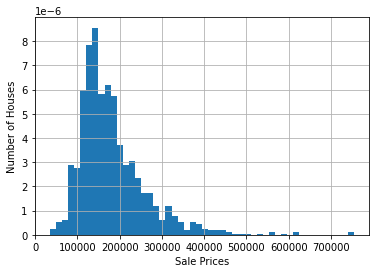

In [58]:
df['SalePrice'].hist(bins=50, density = True)
plt.ylabel('Number of Houses')
plt.xlabel('Sale Prices')
plt.show()

Transform the target using the logarithm

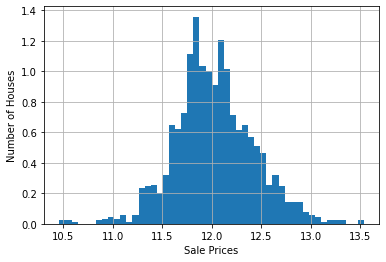

In [59]:
np.log(df['SalePrice']).hist(bins=50, density = True)
plt.ylabel('Number of Houses')
plt.xlabel('Sale Prices')
plt.show()

#### -Variable Types

In [60]:
df_var = pd.DataFrame({
    'columns' : df.columns,
    'types' : df.dtypes,
    'miss' : df.isnull().sum(),
    '%' : df.isnull().sum()/df.shape[0]
})

In [61]:
df_var['Cat_Num'] = df_var.apply(lambda x: 'cat' if x['types']=='object' else 'num', axis=1)

In [62]:
df_var

,columns,types,miss,%,Cat_Num
MSSubClass,MSSubClass,int64,0,0.000000,num
MSZoning,MSZoning,object,0,0.000000,cat
LotFrontage,LotFrontage,float64,259,0.177397,num
LotArea,LotArea,int64,0,0.000000,num
Street,Street,object,0,0.000000,cat
...,...,...,...,...,...
MoSold,MoSold,int64,0,0.000000,num
YrSold,YrSold,int64,0,0.000000,num
SaleType,SaleType,object,0,0.000000,cat
SaleCondition,SaleCondition,object,0,0.000000,cat


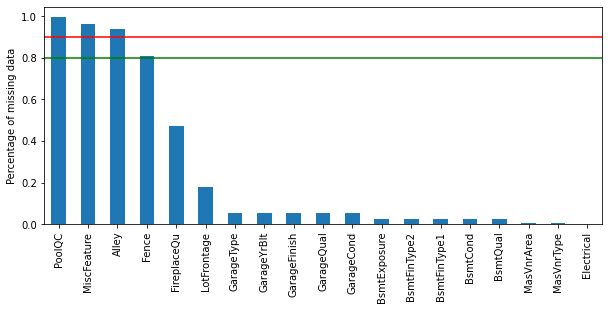

In [63]:
df_var.loc[df_var.miss > 0]['%'].sort_values(ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle = '-')
plt.axhline(y=0.80, color= 'g', linestyle = '-')

### Relationship between missing data and Sale Price

In [64]:
def analyse_na_value(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(),1,0)
    temp = df.groupby(var)['SalePrice'].agg(['mean','std'])
    temp.plot(kind="barh", y="mean", legend=False, xerr="std", title="Sales Price", color='green')

C:\Users\cassio.reis_saudeid\Desktop\CASSIO\UDEMY_ML_DEPLOY\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cassio.reis_saudeid\Desktop\CASSIO\UDEMY_ML_DEPLOY\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


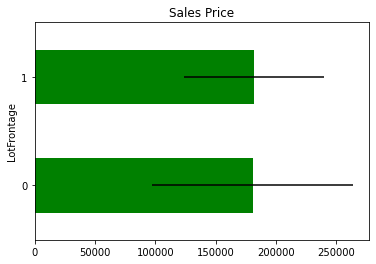

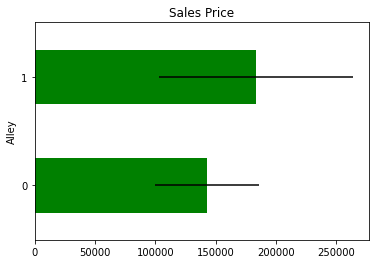

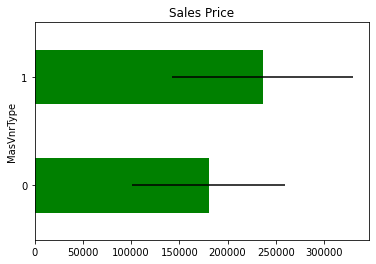

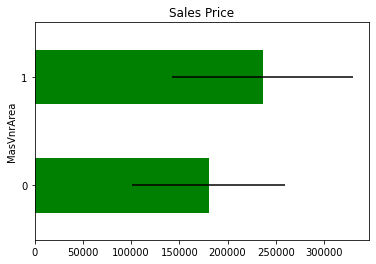

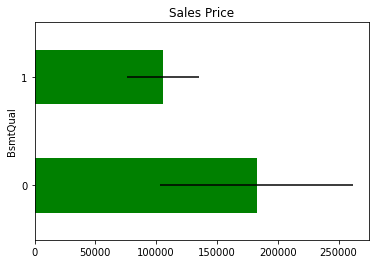

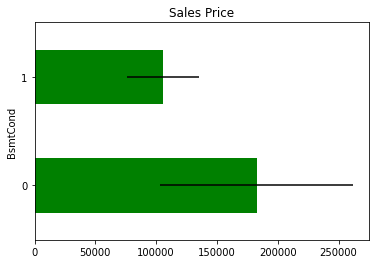

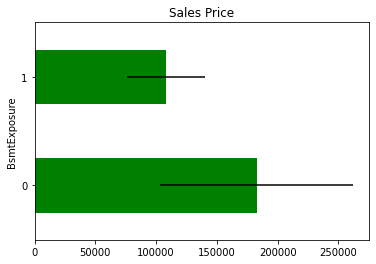

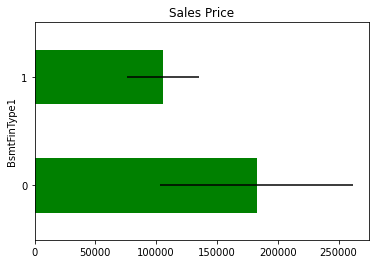

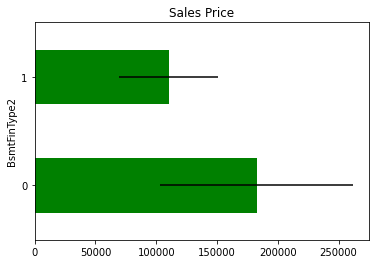

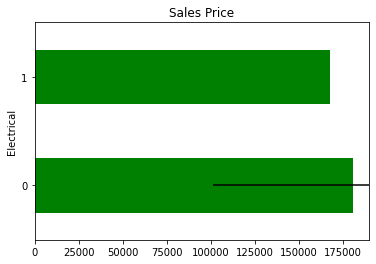

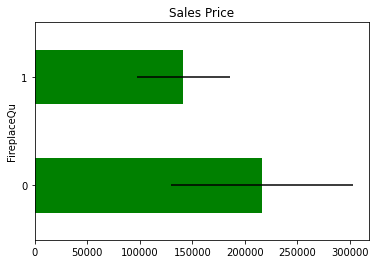

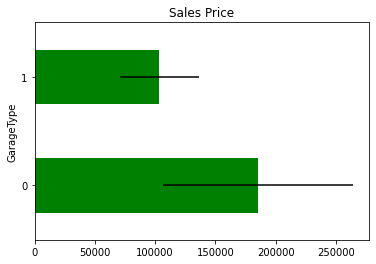

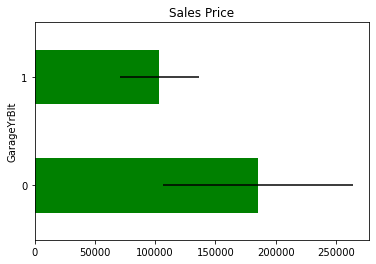

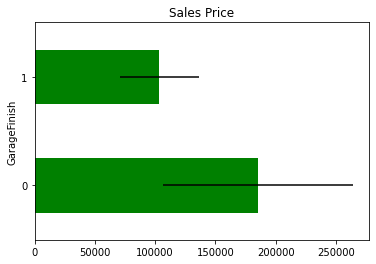

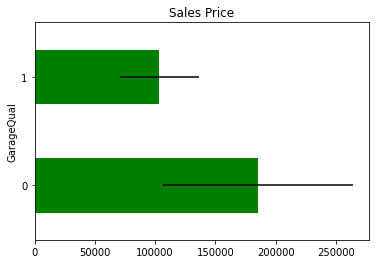

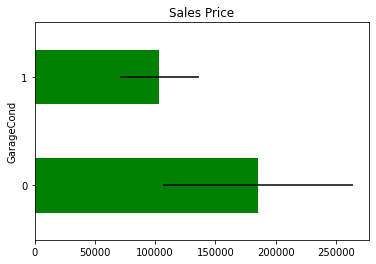

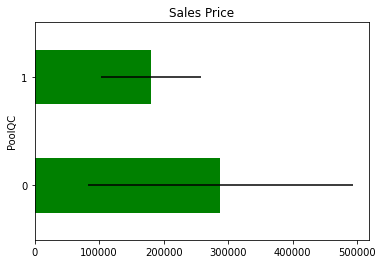

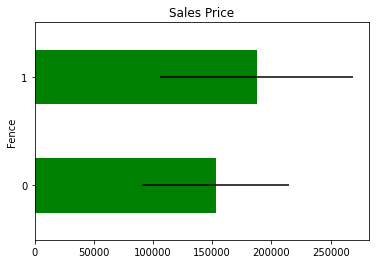

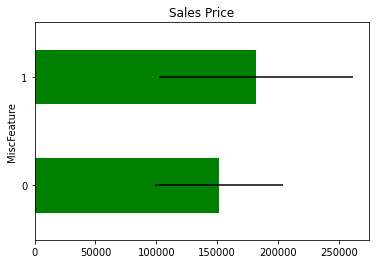

In [65]:
for var in df_var.loc[df_var.miss > 0].index.tolist():
    analyse_na_value(df,var)

# Temporal Variables

In [66]:
year_vars =  [var for var in df_var.index.tolist()  if  'Yr' in var or 'Year' in var]

In [67]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [68]:
for var in year_vars:
    print(var, df[var].unique(),'\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

Text(0, 0.5, 'Median House Price')

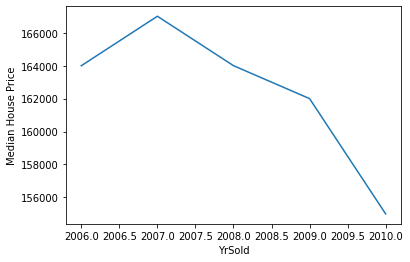

In [69]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Text(0, 0.5, 'Median House Price')

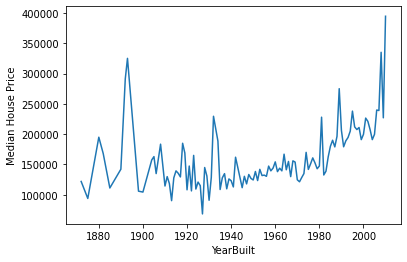

In [70]:
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

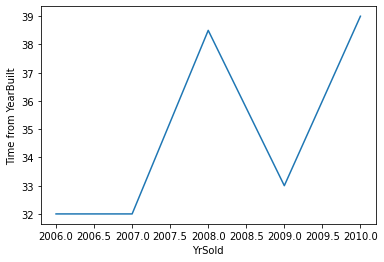

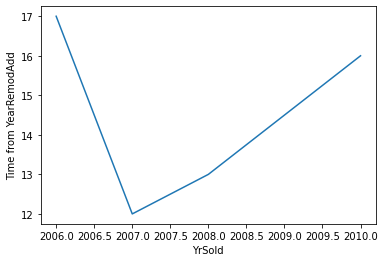

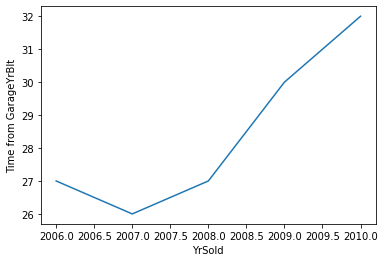

In [71]:
def analyse_year_vars(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]

    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()


for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(df,var)

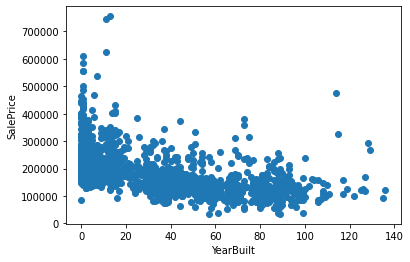

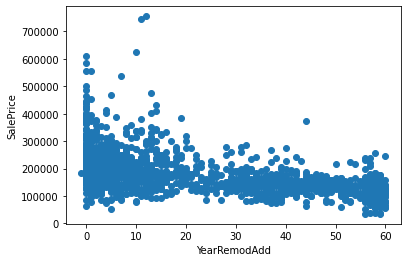

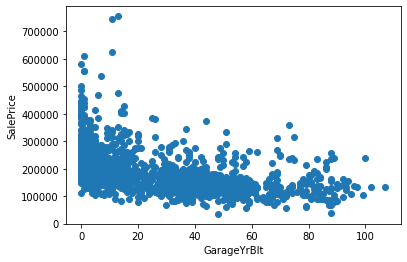

In [72]:
def analyse_year_vars(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var],df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(df,var)

#### Discrete variables

In [73]:
discrete_vars= [var for var in df_var.loc[df_var.Cat_Num=='num'].index.tolist() if len(df[var].unique()) < 20 and var not in year_vars]

In [74]:
print(f'Number of discreve variables: {len(discrete_vars)}')

Number of discreve variables: 14


In [75]:
df[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


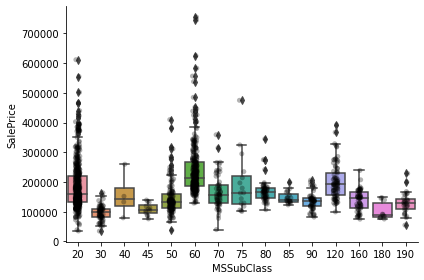

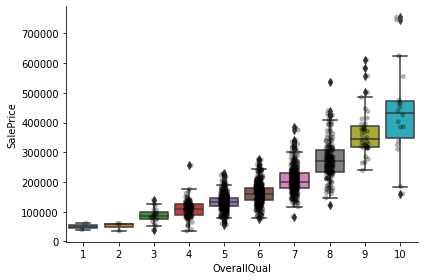

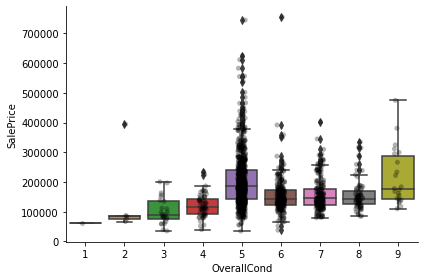

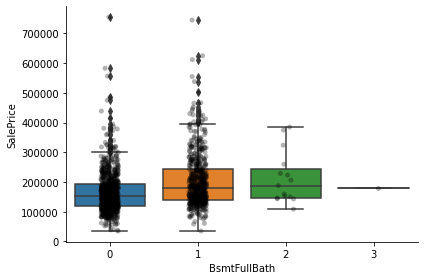

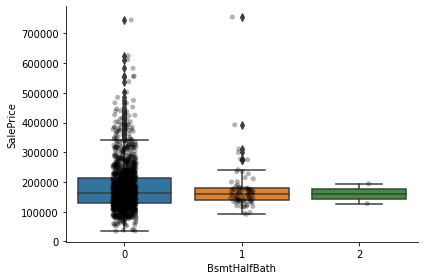

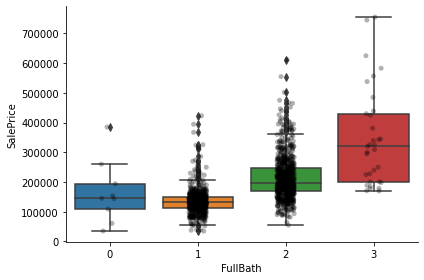

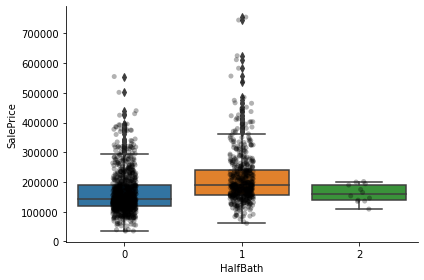

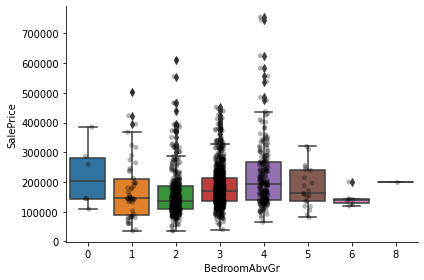

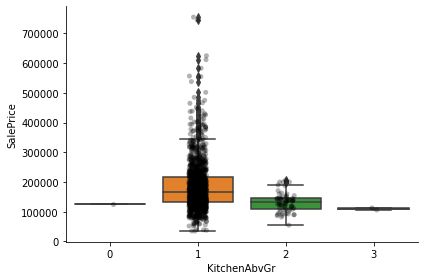

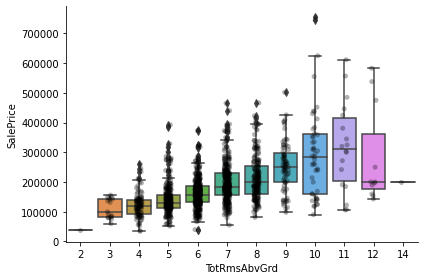

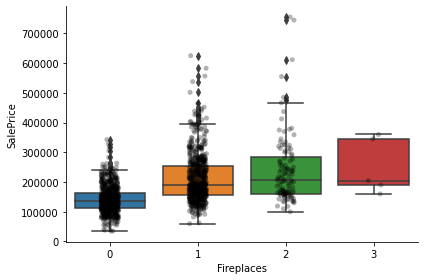

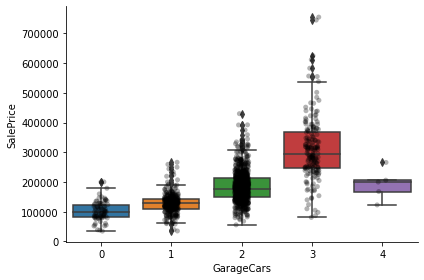

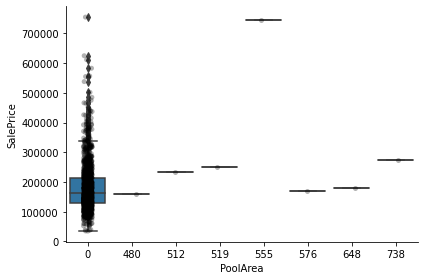

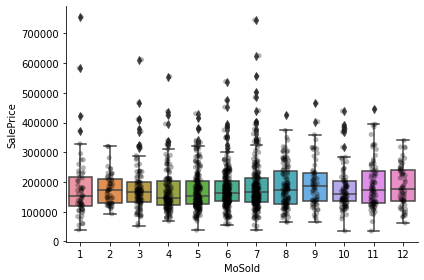

In [76]:
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=df, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

#### Continuous variables

In [77]:
continuos_variables= [var for var in df_var.loc[df_var.Cat_Num=='num'].index.tolist() if var not in discrete_vars + year_vars]
print(f'Number of continuous variables : {len(continuos_variables)}')

Number of continuous variables : 19


In [78]:
df[continuos_variables]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,142125


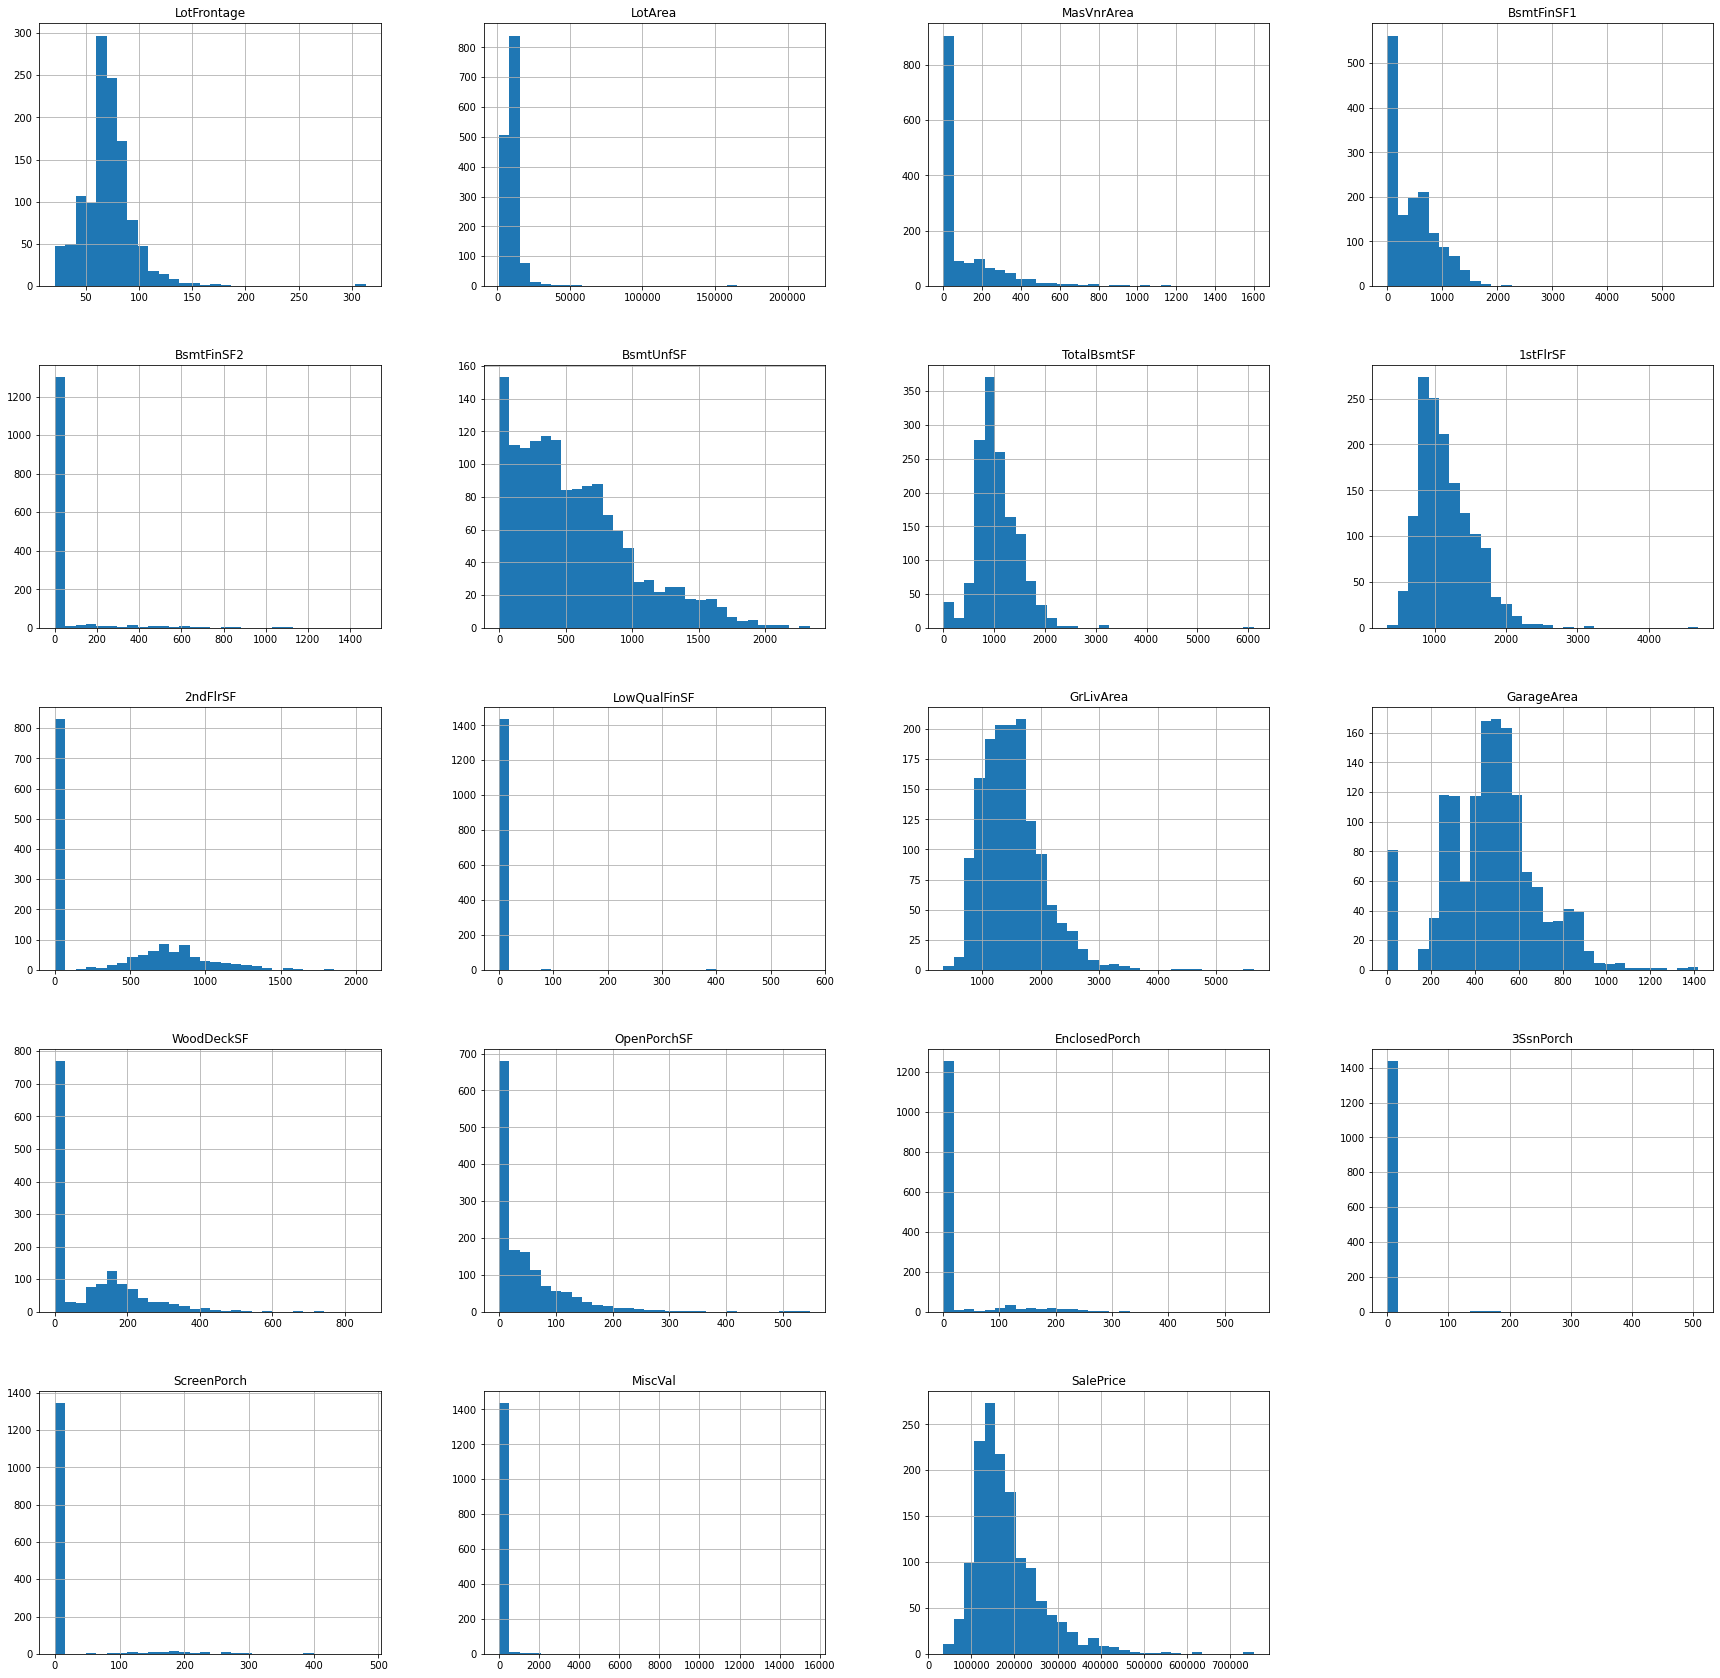

In [79]:
df[continuos_variables].hist(bins=30, figsize=(30,30))
plt.show()

In [80]:
#first make a list with the super skwed variables

skewed = [
    'BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'
]

In [81]:
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF'

]

##### 4.3.1 YeoJohnson transformation

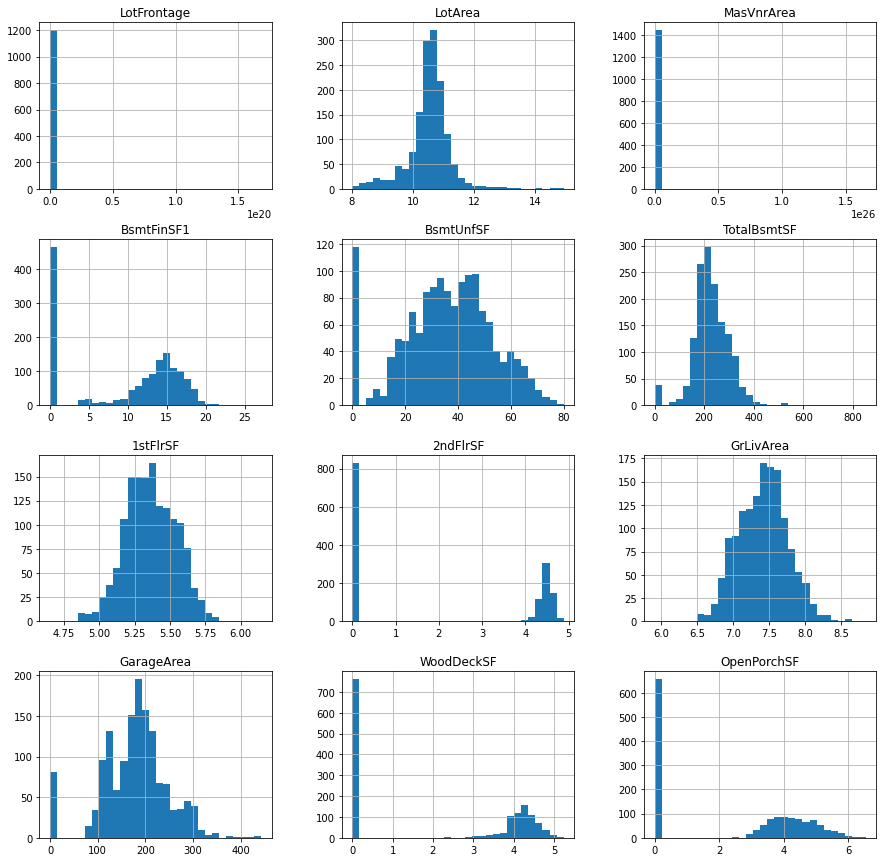

In [82]:
tmp = df.copy()

for var in cont_vars:
    tmp[var],param = stats.yeojohnson(df[var])

tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

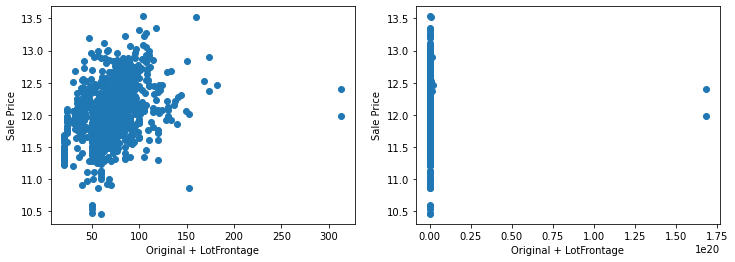

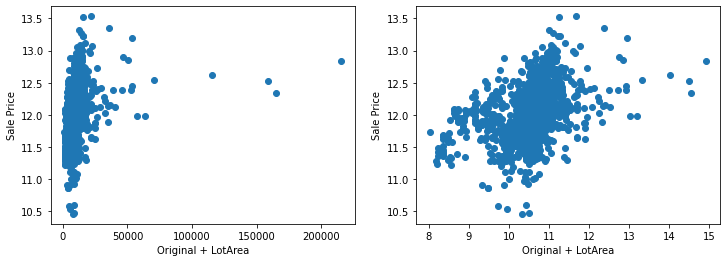

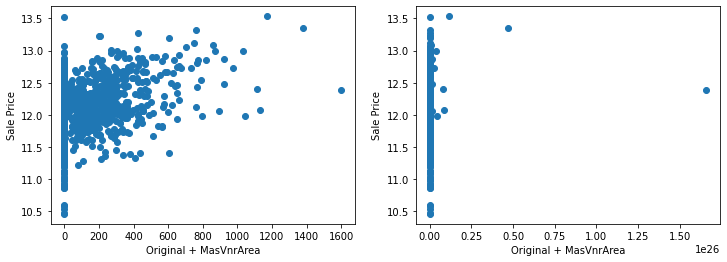

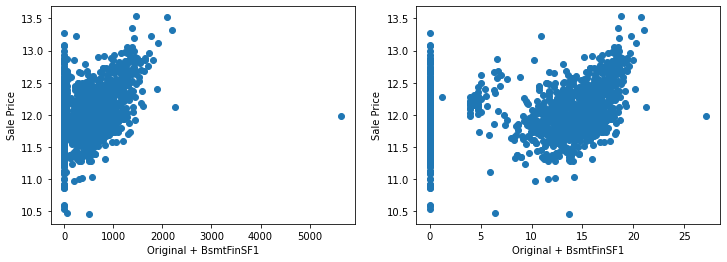

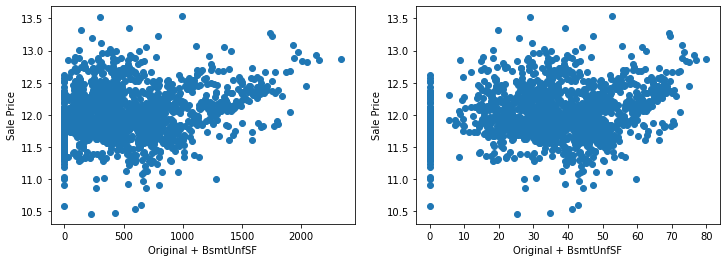

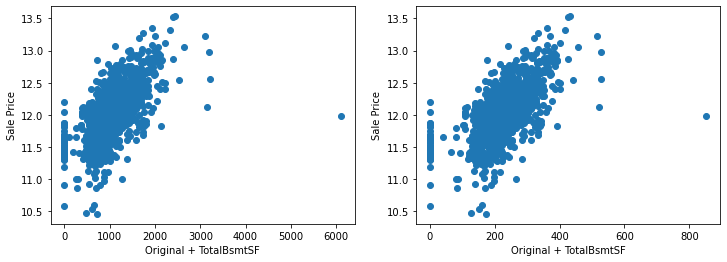

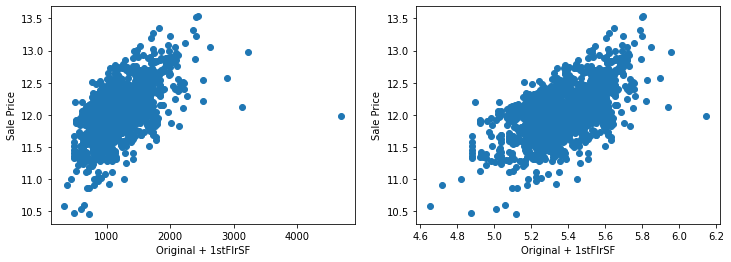

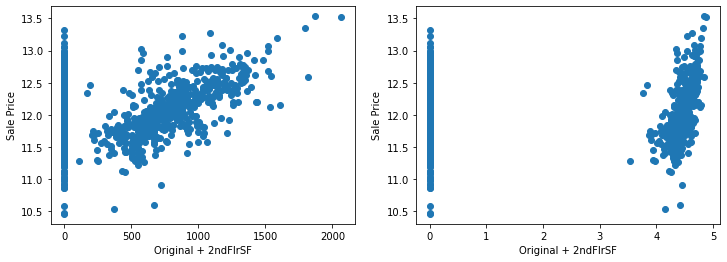

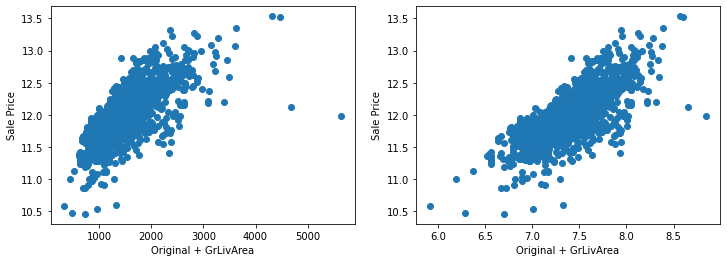

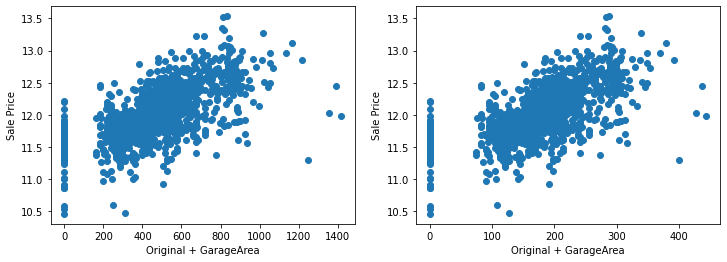

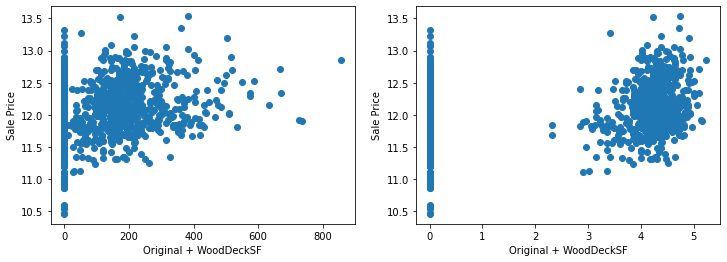

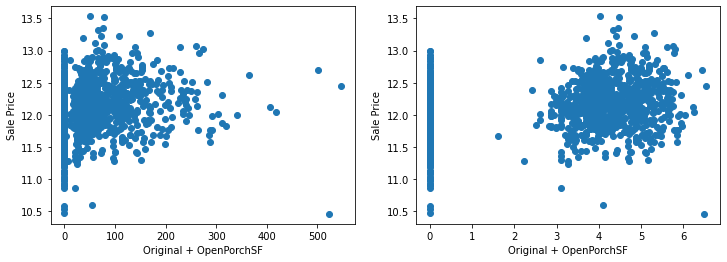

In [83]:
#lets plot the original or transformed variables
# vs saleprice, see if there is a relationship

for var in cont_vars:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.scatter(df[var], np.log(df.SalePrice))
    plt.ylabel('Sale Price')
    plt.xlabel(f'Original + {var}')

    #Plot transformed variables vs sale price
    plt.subplot(1,2,2)
    plt.scatter(tmp[var], np.log(df.SalePrice))
    plt.ylabel('Sale Price')
    plt.xlabel(f'Original + {var}')

    plt.show()

##### 4.3.2 Logarithmic transformation

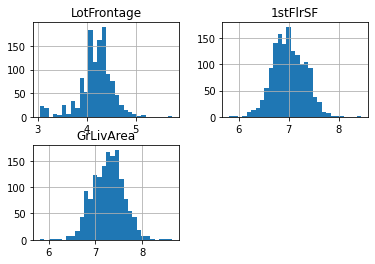

In [84]:
# Lets go ahead and analyse the distruibutions of these variables
# after applying a logarithmic transformation

tmp = df.copy()

for var in ["LotFrontage","1stFlrSF",'GrLivArea']:

    tmp[var] = np.log(df[var])

tmp[["LotFrontage","1stFlrSF",'GrLivArea']].hist(bins=30)
plt.show()

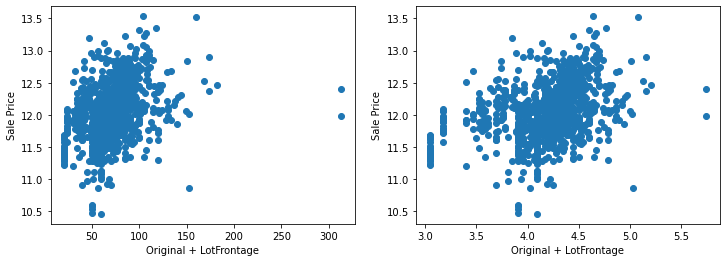

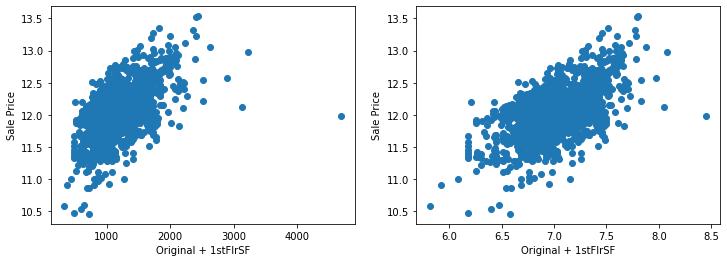

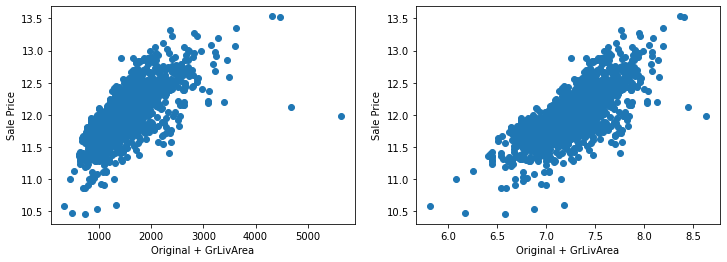

In [85]:
#lets plot the original or transformed variables
# vs saleprice, see if there is a relationship

for var in ["LotFrontage","1stFlrSF",'GrLivArea']:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.scatter(df[var], np.log(df.SalePrice))
    plt.ylabel('Sale Price')
    plt.xlabel(f'Original + {var}')

    #Plot transformed variables vs sale price
    plt.subplot(1,2,2)
    plt.scatter(tmp[var], np.log(df.SalePrice))
    plt.ylabel('Sale Price')
    plt.xlabel(f'Original + {var}')

    plt.show()

#### 4.4 Skewed variables
Let's transform them into binary variables and see how predictive they are

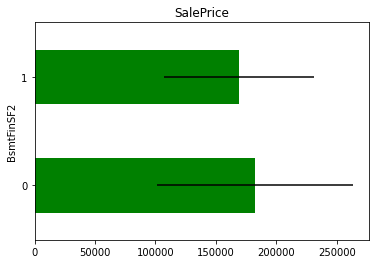

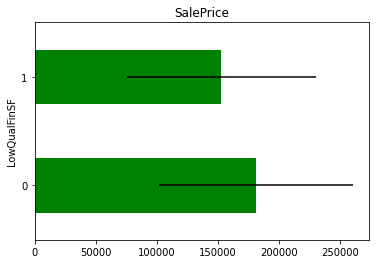

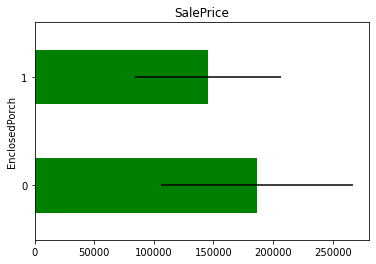

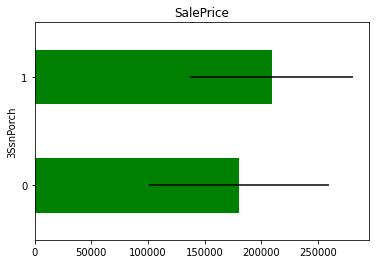

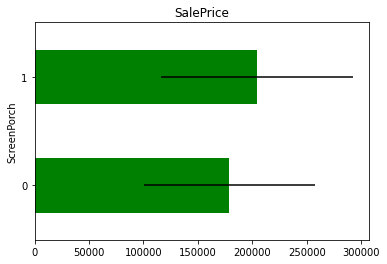

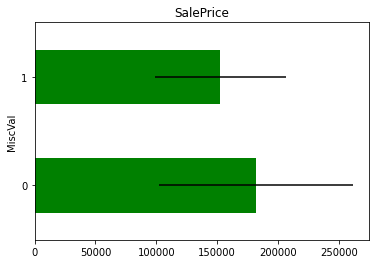

In [86]:
for var in skewed:
    tmp = df.copy()

    tmp[var] = np.where(df[var]==0,0,1)
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean','std'])

    tmp.plot(kind="barh", y="mean", legend=False, xerr="std", title="SalePrice", color='green')
    plt.show()

#### 5 Categorial Analysis

#### 5.1 Cardinality

In [87]:
cat_vars = df_var.loc[df_var.Cat_Num =='cat'].index.tolist()

<AxesSubplot:>

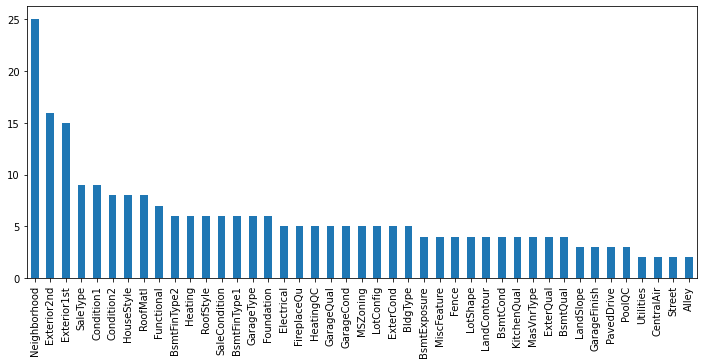

In [88]:
#we count unique categories with pandas unique
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

#### 5.2 Quality variables

The mapping can be obtained from the Kaggle Website. One example
- Ex = Excellent
- Gd = Good
- TA = Avarege/Typical
- Fa = Fair
- Po = Poor

In [89]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

In [90]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

df[var] = df[var].map(exposure_mappings)


In [91]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)


In [92]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

df[var] = df[var].map(garage_mappings)


In [93]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

df[var] = df[var].map(fence_mappings)

In [94]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

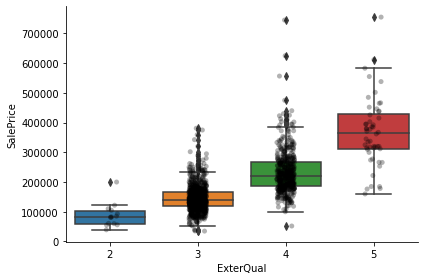

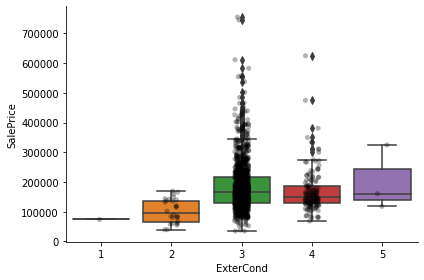

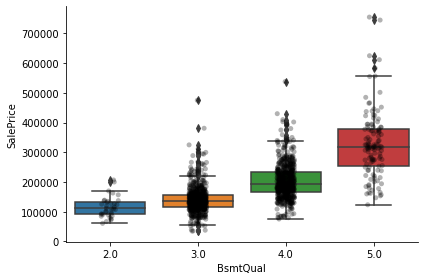

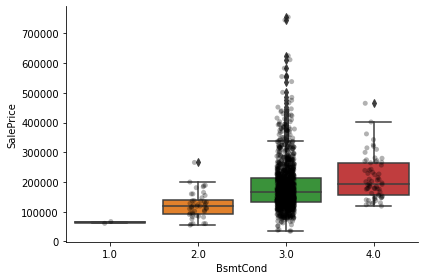

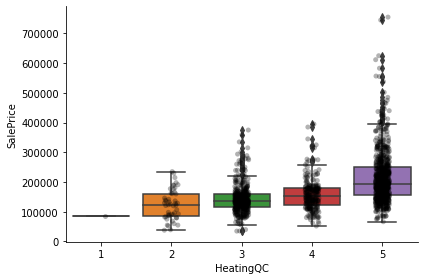

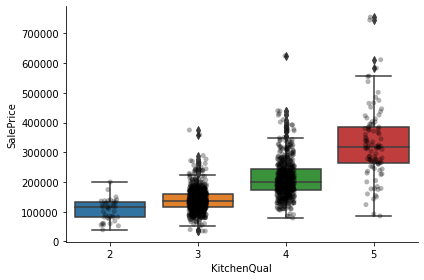

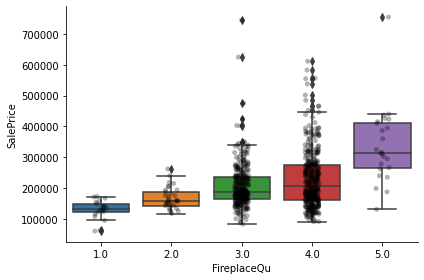

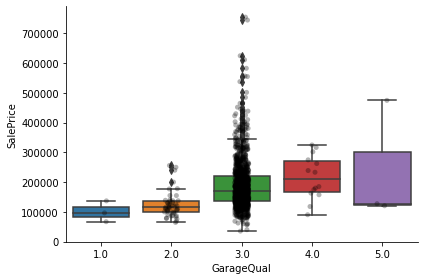

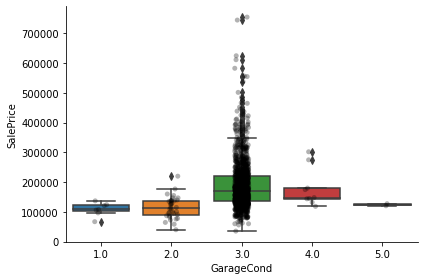

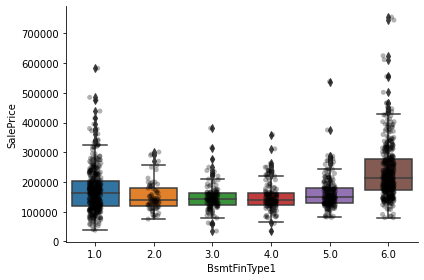

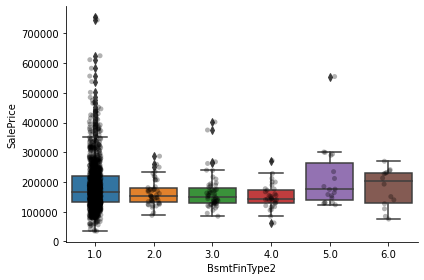

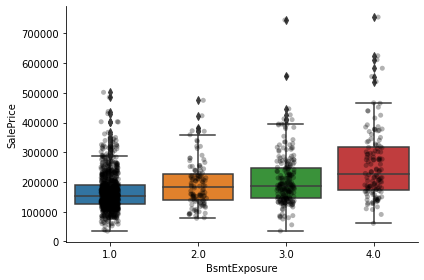

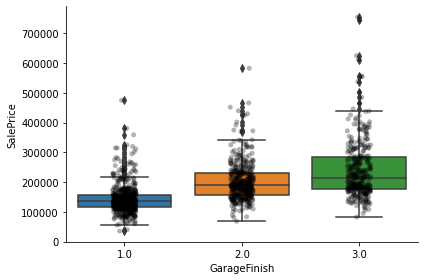

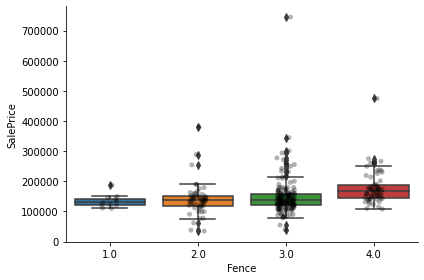

In [95]:
# now let's plot the house mean sale price based on the quality of the
# various attributes

for var in qual_vars:
    sns.catplot(x=var, y='SalePrice', data=df, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    # make boxplot with Catplot
    plt.show()

In [96]:
# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

29

In [98]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(df, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

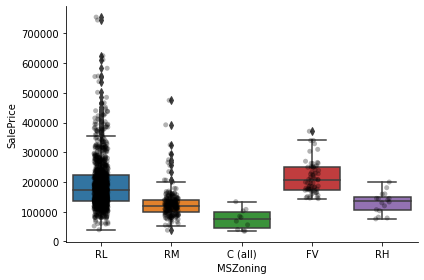

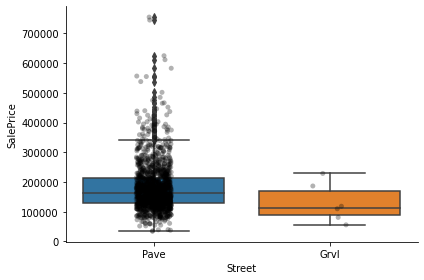

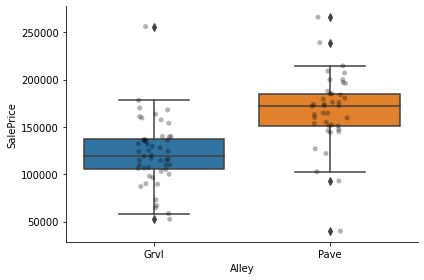

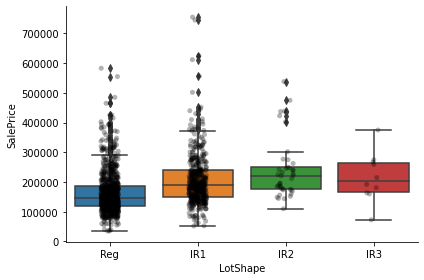

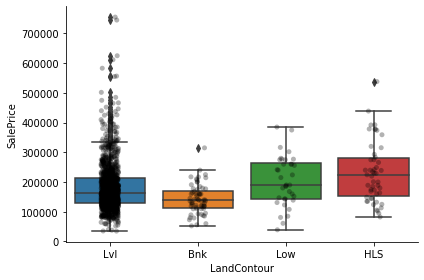

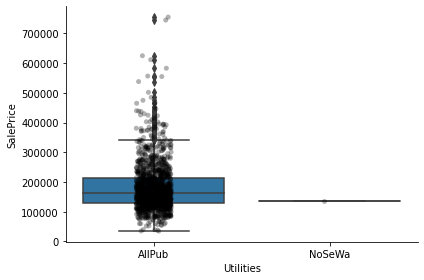

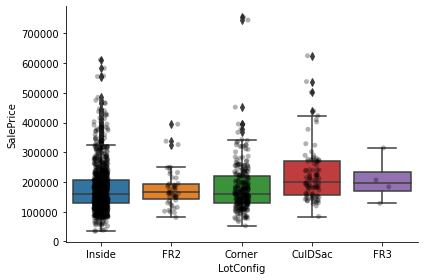

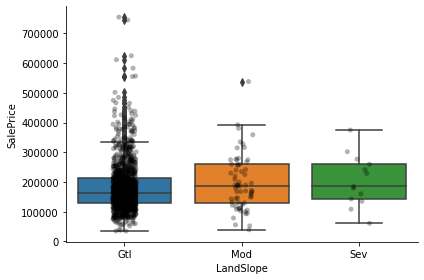

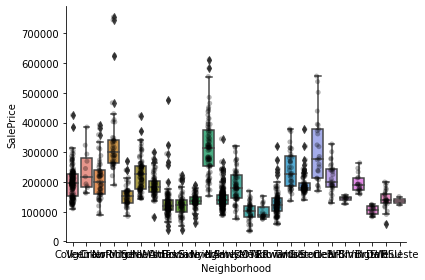

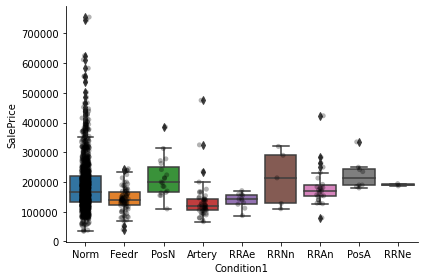

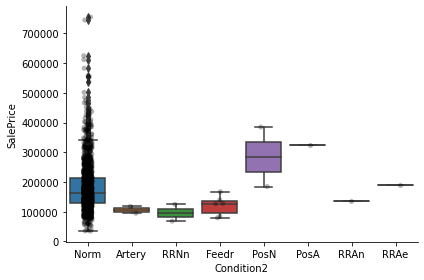

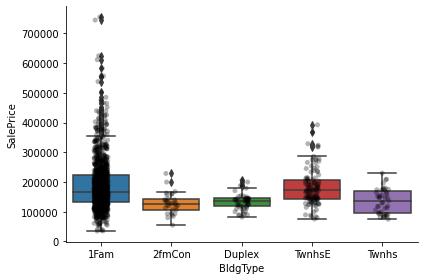

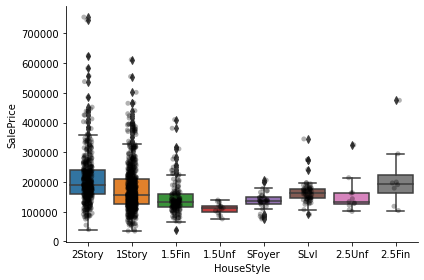

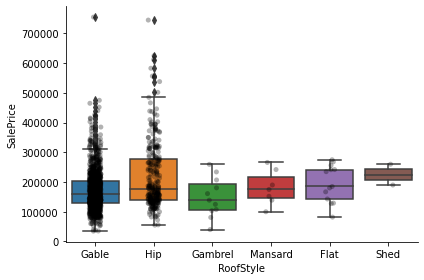

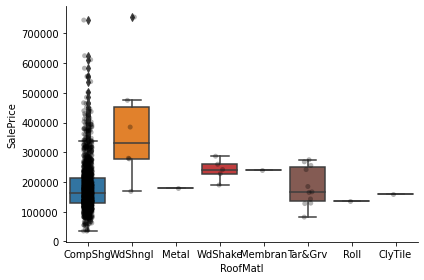

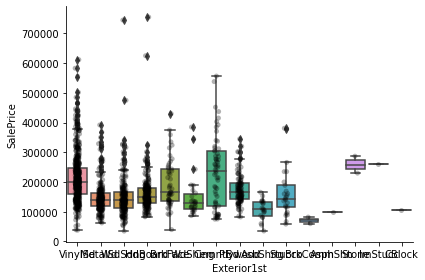

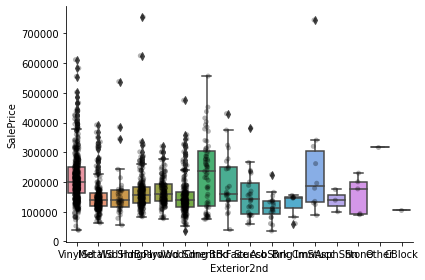

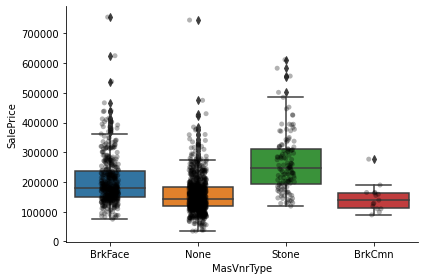

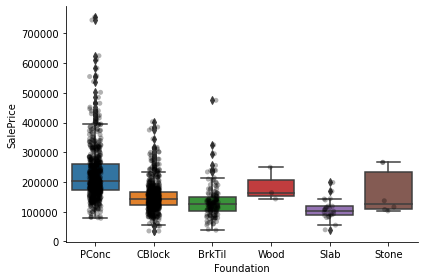

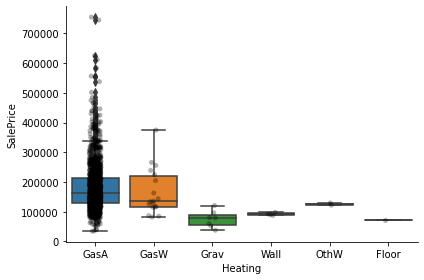

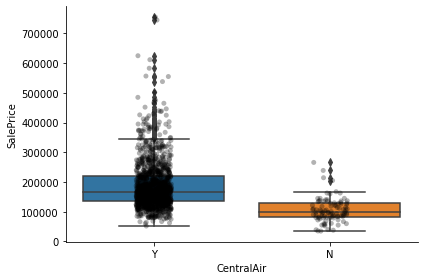

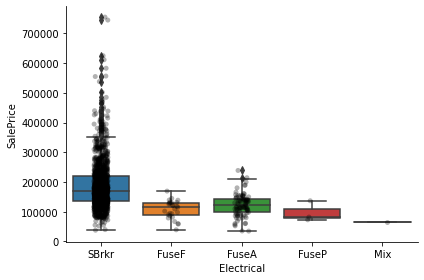

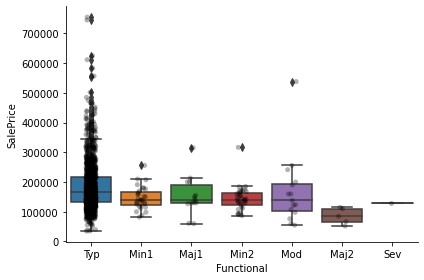

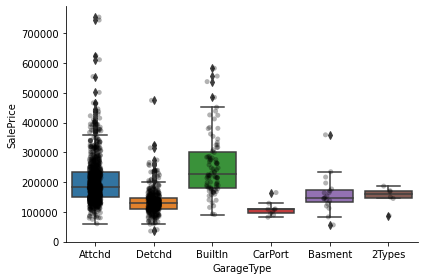

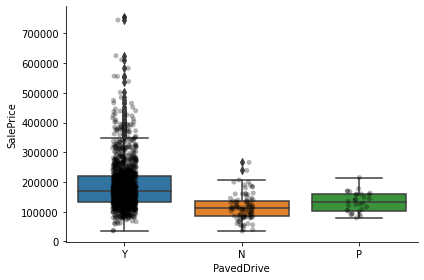

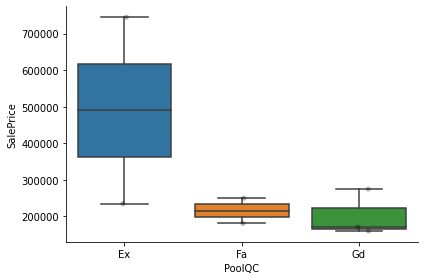

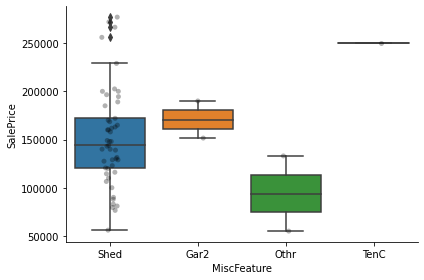

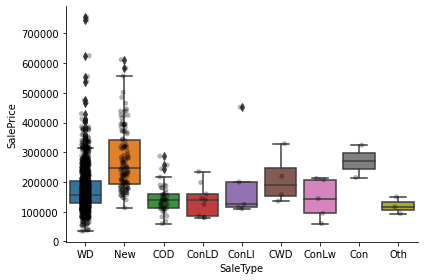

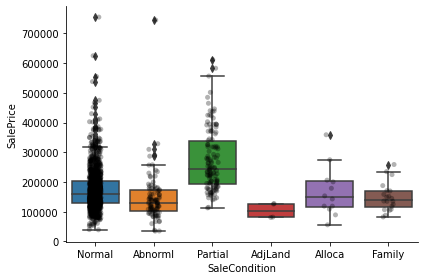

In [100]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()